In [17]:
# Import
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.graph_objects as go
from matplotlib import pyplot as plt

# Understanding the beta distribution
The distribution of probablity of winning given thr number of trials conducted. For 3 machines A, B, C which were tried for 3, 30, 300 iterations the probablities are the same i.e.

A => 2 wins, 1 loss => 2/3
B => 20 wins, 10 loss => 20/30
c => 200 wins, 100 loss => 200/300

Although these probablities are the same the confidence in machine C should be highest as it has been tested 300 times nearly 10 times more than B and 100 times more than A. Confidence in the three is in the order of decend C >> B >> A.
To formally define this we use the beta distribution. Hence by figure:


![image.png](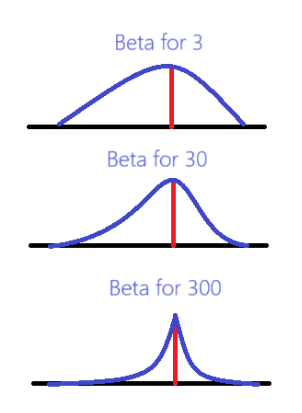
)



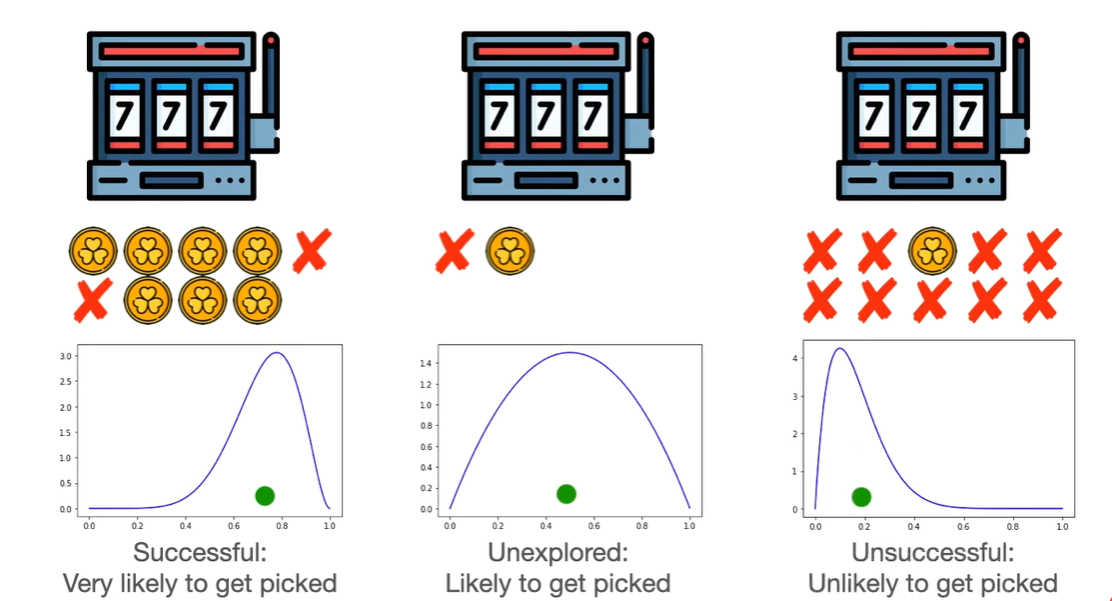

In [18]:
# Creating a Bandit class
class BernoullisBandit(object):
  def __init__(self, p):
    self.p = p

  def display_ad(self):
    reward = np.random.binomial(n=1, p=self.p)
    return reward

In [19]:
# Creating variables to keep track of rewards
n_prods = 150000 # Number of exploitive iterations

# Creating Advert instances
adA = BernoullisBandit(0.004)
adB = BernoullisBandit(0.016)
adC = BernoullisBandit(0.02)
adD = BernoullisBandit(0.028)
adE = BernoullisBandit(0.031)
ads = [adA, adB, adC, adD, adE]
ad_name = ['adA','adB', 'adC', 'adD', 'adE']

In [20]:
class SimulateThompsonSample(object):
  # Initialise a class to simulate thompsons model
  def __init__(self, n_prods: int, ads: list, ad_name: list):
    self.n_prods = n_prods
    self.ads = ads
    self.ads_name = ad_name
    self.n_ads = len(ads)
    self.alphas = np.ones(self.n_ads)
    self.betas = np.ones(self.n_ads)
    self.total_rewards = 0
    self.avg_rewards = []
    self.total_runs = 0

  # Simulate function
  def simulate(self) -> tuple:
    for i in range(self.n_prods):
      self.total_runs += 1
      theta_samples = [np.random.beta(self.alphas[k], self.betas[k]) for k in range(self.n_ads)]
      ad_chosen = np.argmax(theta_samples)
      R = self.ads[ad_chosen].display_ad()
      self.alphas[ad_chosen] += R
      self.betas[ad_chosen] += 1 - R
      self.total_rewards += R
      self.avg_rewards.append(self.total_rewards/self.total_runs)
    return (self.total_rewards, self.avg_rewards, self.total_runs)

  # Average Reward over iteration
  def plot_avg_over_iterations(self) -> go.Figure():
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=np.arange(1,self.total_runs+1), y=self.avg_rewards, mode='lines', name='lines', line = dict(color='firebrick')))
    fig.update_layout(title='Average Reward Value with Iterations', xaxis_title='Iterations', yaxis_title='Average Rewards', showlegend=False)
    return fig

In [21]:
simulation1 = SimulateThompsonSample(n_prods, ads, ad_name)
total_rewards1, avg_rewards1, total_runs1 = simulation1.simulate()
fig = simulation1.plot_avg_over_iterations()
fig.show()